# Глава 12 - Метод К-ближайших соседей

In [1]:
from __future__ import division
from collections import Counter
from statistics import mean
import math, random
import matplotlib.pyplot as plt
import re

In [2]:
#
# Блок функций для работы с векторами (Глава 4)
#

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [3]:
# грубый подсчёт большинства
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

In [4]:
# отбор по большинству
def majority_vote(labels):
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1])

In [5]:
# функция классификации на сонове ближайших соседей
def knn_classify(k, labeled_points, new_point):
    
    by_distance = sorted(labeled_points, key=lambda point_label: distance(point_label[0], new_point))
    
    k_nearest_labels = [label for _, label in by_distance[:k]]
    
    return majority_vote(k_nearest_labels)

In [6]:
# функция прорисовки границ штатов
segments = []
points = []

lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

with open("states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

# функция прорисовки границ штатов        
def plot_state_borders(color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

In [7]:
# города
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

# ключ = язык, значение = пара(долгота, широта)
plots = {'Java': ([],[]), 'Python': ([],[]), 'R': ([],[])}

#каждый язык должен иметь разную метку и цвет
markers = {'Java': 'o', 'Python': 's', 'R': '^'}
colors = {'Java': 'r', 'Python': 'b', 'R': 'g'}

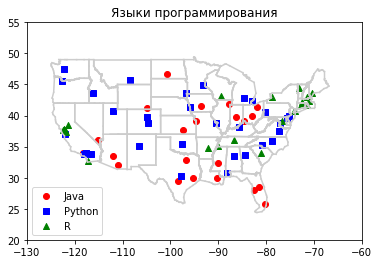

In [8]:
for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)
            
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language], label=language, zorder=0)
    
plot_state_borders()
plt.legend(loc=0)
plt.axis([-130, -60, 20, 55])
plt.title('Языки программирования')
plt.show()

In [9]:
# попробовать несколько разных значений к
for k in [1,3,5,7]:
    num_correct = 0
    
    for location, actual_language in cities:
        #(location, actual_language) = city
        #print(location, actual_language)
        other_cities = [other_city 
                       for other_city in cities
                       if other_city != (location, actual_language)]
        # предсказанный язык
        predicted_language = knn_classify(k, other_cities, location)
        #print(predicted_language, actual_language)
        
        if predicted_language == actual_language:
            
            num_correct += 1
        
    print('{} сосед(а,ей): {} правильный из {}'.format(k, num_correct, len(cities)))

1 сосед(а,ей): 40 правильный из 75
3 сосед(а,ей): 44 правильный из 75
5 сосед(а,ей): 41 правильный из 75
7 сосед(а,ей): 35 правильный из 75


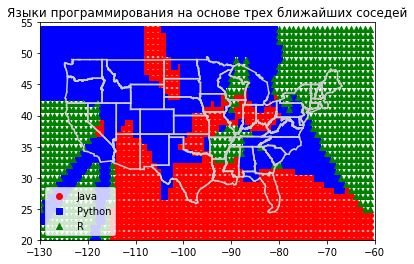

In [10]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

k = 3

for longitude in range(-130, -60):
    for latitude in range(20, 55):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)
        
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language], label=language, zorder=0)
plot_state_borders()
plt.legend(loc=0)
plt.axis([-130, -60, 20, 55])
plt.title('Языки программирования на основе трех ближайших соседей')
plt.show()